In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType


# Define the schema based on your data structure
schema = StructType([
    StructField("tweet_id", StringType(), True),
    StructField("timestamp", StringType(), True),
    StructField("date", StringType(), True),
    StructField("source", StringType(), True),
    StructField("username", StringType(), True),
    StructField("text", StringType(), True),
])

# Initialize SparkSession with MongoDB configurations
spark = SparkSession.builder \
    .appName("Load CSV from HDFS to MongoDB") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/myNewDatabase.myCollection") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.0.0") \
    .getOrCreate()

# Load the CSV file
df = spark.read.csv(
    "hdfs://localhost:9000/CA2/ProjectTweets.csv",
    schema=schema,
    header=True
)

# Show DataFrame to verify the data (optional)
df.show()

# Write data to MongoDB
df.write.format("mongo") \
    .mode("overwrite") \
    .option("uri", "mongodb://127.0.0.1:27017/myNewDatabase.myCollection") \
    .option("database", "myNewDatabase") \
    .option("collection", "myCollection") \
    .save()

    
# Stop the Spark session
spark.stop()


24/04/27 16:15:47 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 0, 1467810369, Mon Apr 06 22:19:45 PDT 2009, NO_QUERY, _TheSpecialOne_, @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
 Schema: tweet_id, timestamp, date, source, username, text
Expected: tweet_id but found: 0
CSV file: hdfs://localhost:9000/CA2/ProjectTweets.csv
+--------+----------+--------------------+--------+---------------+--------------------+
|tweet_id| timestamp|                date|  source|       username|                text|
+--------+----------+--------------------+--------+---------------+--------------------+
|       1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|       2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|       3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|       4|1467811193|Mon Apr 06 22:19:..

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MongoDB Integration") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/myNewDatabase.myCollection") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/myNewDatabase.myCollection") \
    .getOrCreate()


24/05/11 09:08:59 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
df = spark.read.format("mongo").load()

In [1]:
from pyspark.sql import SparkSession

# Initialize Spark Session with MongoDB Spark Connector
spark = SparkSession.builder \
    .appName("MongoDB Integration") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/myNewDatabase.myCollection") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/myNewDatabase.myCollection") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()


24/05/11 09:17:15 WARN Utils: Your hostname, muhammad-VM resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/05/11 09:17:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/hduser/.local/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/hduser/.ivy2/cache
The jars for the packages stored in: /home/hduser/.ivy2/jars
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-8b0b5807-cb0d-480d-9e5e-9eaed63b3168;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 295ms :: artifacts dl 4ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts 

In [2]:
df = spark.read.format("mongo").load()

In [3]:
# Register the DataFrame as a temporary view so i can perform SQL queries
df.createOrReplaceTempView("tweets")

In [4]:
# Count tweets by username
tweets_by_username = spark.sql("""
    SELECT username, COUNT(*) as tweet_count
    FROM tweets
    GROUP BY username
    ORDER BY tweet_count DESC
""")


In [5]:
# Show the result of the SQL query
tweets_by_username.show()

+---------------+-----------+
|       username|tweet_count|
+---------------+-----------+
|       lost_dog|        549|
|        webwoke|        345|
|       tweetpet|        310|
|SallytheShizzle|        281|
|    VioletsCRUK|        279|
|    mcraddictal|        276|
|       tsarnick|        248|
|    what_bugs_u|        246|
|    Karen230683|        238|
|      DarkPiano|        236|
|   SongoftheOss|        227|
|      Jayme1988|        225|
|         keza34|        219|
| ramdomthoughts|        216|
|      shanajaca|        213|
|         wowlew|        212|
|   TraceyHewins|        211|
|     nuttychris|        211|
|   thisgoeshere|        207|
|     Spidersamm|        205|
+---------------+-----------+
only showing top 20 rows



In [6]:
# Filter tweets containing specific words like happy
tweets_with_specific_word = spark.sql("""
    SELECT *
    FROM tweets
    WHERE text LIKE '%happy%'
""")

In [7]:
# Show some of these filtered tweets
tweets_with_specific_word.show()

+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+--------------+
|                 _id|                date|     formatted_date|  source|                text| timestamp|tweet_id|      username|
+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+--------------+
|{662d16a353867b39...|Mon Apr 06 22:22:...|2009-04-07 06:22:05|NO_QUERY|@Viennah Yay! I'm...|1467819650|      45|     antzpantz|
|{662d16a353867b39...|Mon Apr 06 22:25:...|2009-04-07 06:25:49|NO_QUERY|wonders why someo...|1467834001|      79|     emo_holic|
|{662d16a353867b39...|Sat Apr 18 08:51:...|2009-04-18 16:51:51|NO_QUERY|@Alyssa_Milano Th...|1551364639|  816238|  Rachael90210|
|{662d16a353867b39...|Mon Apr 06 22:28:...|2009-04-07 06:28:04|NO_QUERY|I'm missing you b...|1467842377|     134|       bnr0201|
|{662d16a353867b39...|Mon Apr 06 22:31:...|2009-04-07 06:31:43|NO_QUERY|@penndbad send me...|1467

In [8]:
# SQL Query to find the username with the most tweets
max_tweets_by_user = spark.sql("""
    SELECT username, COUNT(*) AS tweet_count
    FROM tweets
    GROUP BY username
    ORDER BY tweet_count DESC
    LIMIT 1
""")

# Show the result
max_tweets_by_user.show(5)


+--------+-----------+
|username|tweet_count|
+--------+-----------+
|lost_dog|        549|
+--------+-----------+



In [9]:
# Calculate the average number of tweets per user
avg_tweets_by_user = spark.sql("""
    SELECT username, AVG(tweet_count) AS avg_tweet_count
    FROM (
        SELECT username, COUNT(*) AS tweet_count
        FROM tweets
        GROUP BY username, date
    )
    GROUP BY username
""")
avg_tweets_by_user.show()


+---------------+---------------+
|       username|avg_tweet_count|
+---------------+---------------+
|        meeagen|            1.0|
|        thePuck|            1.0|
|       irlbinky|            1.0|
|        Rettles|            1.0|
|  RosieMeikle_x|            1.0|
|     prbyrachel|            1.0|
|       Ldnshmoo|            1.0|
|        mangy20|            1.0|
|      johntyyk3|            1.0|
|          d8mtr|            1.0|
|      jamiekim2|            1.0|
| saratpediredla|            1.0|
|    Emogirltalk|            1.0|
|       amie_m66|            1.0|
|     jenica1201|            1.0|
|Becca_Back2Good|            1.0|
|      sammy_boy|            1.0|
|      DanielYeo|            1.0|
|          W0CKY|            1.0|
|  divingkid2001|            1.0|
+---------------+---------------+
only showing top 20 rows



In [10]:
# Calculate the total number of tweets per year by each user
total_tweets_per_year_by_user = spark.sql("""
    SELECT username, YEAR(date) AS year, COUNT(*) AS total_tweets
    FROM tweets
    GROUP BY username, YEAR(date)
""")
total_tweets_per_year_by_user.show()


+---------------+----+------------+
|       username|year|total_tweets|
+---------------+----+------------+
|     megan_rice|NULL|          15|
|        Daniiej|NULL|           3|
|     prbyrachel|NULL|           1|
|    beesarahlee|NULL|           1|
|   willjackson8|NULL|           1|
|         MeghTW|NULL|           1|
|   candicebunny|NULL|           1|
|stranger_danger|NULL|          14|
|  divingkid2001|NULL|           1|
|   christaflint|NULL|           2|
|kathleeenlalala|NULL|           7|
|    galovesongs|NULL|           3|
|    Lilli_Allen|NULL|           1|
| MusicLover7196|NULL|           6|
|        caaaami|NULL|           1|
|       J_Moneyy|NULL|           7|
|        SoEdith|NULL|           5|
|     convoy3571|NULL|          13|
|       kyrabeth|NULL|           1|
|     amandajoyy|NULL|           1|
+---------------+----+------------+
only showing top 20 rows



In [11]:
# Calculate the total number of tweets in the dataset
sum_all_tweets = spark.sql("""
    SELECT COUNT(*) AS total_tweets
    FROM tweets
""")
sum_all_tweets.show()


+------------+
|total_tweets|
+------------+
|     1599999|
+------------+



In [12]:
# Count the number of tweets by source
tweets_by_source = spark.sql("""
    SELECT source, COUNT(*) AS tweet_count
    FROM tweets
    GROUP BY source
""")
tweets_by_source.show()


+--------+-----------+
|  source|tweet_count|
+--------+-----------+
|NO_QUERY|    1599999|
+--------+-----------+



In [13]:
avg_tweets_by_user.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "avgTweetsByUser").save()


In [14]:
total_tweets_per_year_by_user.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "totalTweetsPerYearByUser").save()


In [15]:
sum_all_tweets.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "sumAllTweets").save()


In [16]:
# Tweets per day
tweets_per_day = spark.sql("""
    SELECT DATE(date) AS tweet_date, COUNT(*) AS tweet_count
    FROM tweets
    GROUP BY tweet_date
    ORDER BY tweet_date
""")
tweets_per_day.show()


+----------+-----------+
|tweet_date|tweet_count|
+----------+-----------+
|      NULL|    1599999|
+----------+-----------+



In [17]:
from pyspark.sql.functions import explode, split

# count hashtags in tweet content
hashtags = df.select(explode(split(df.text, ' ')).alias('word')) \
    .filter("word LIKE '#%'") \
    .groupBy('word') \
    .count() \
    .orderBy('count', ascending=False)

hashtags.show()


+----------------+-----+
|            word|count|
+----------------+-----+
|   #followfriday| 1827|
|             #fb| 1728|
|    #squarespace|  818|
|        #seb-day|  498|
|             #FF|  497|
|               #|  472|
|   #FollowFriday|  407|
|              #1|  391|
|    #musicmonday|  382|
|   #iranelection|  337|
|             #ff|  325|
|           #fail|  288|
|            #BSB|  273|
|      #iremember|  263|
|     #myweakness|  259|
|        #asot400|  254|
|   #marsiscoming|  244|
|#mcflyforgermany|  230|
|              #2|  214|
|  #andyhurleyday|  187|
+----------------+-----+
only showing top 20 rows



In [18]:
avg_tweet_length = spark.sql("""
    SELECT AVG(LENGTH(text)) AS avg_length
    FROM tweets
""")
avg_tweet_length.show()


+-----------------+
|       avg_length|
+-----------------+
|74.09008505630317|
+-----------------+



In [19]:
from pyspark.sql.functions import hour

tweets_per_hour = df.withColumn('hour', hour(df.date)) \
    .groupBy('hour') \
    .count() \
    .orderBy('hour')

tweets_per_hour.show()


+----+-------+
|hour|  count|
+----+-------+
|NULL|1599999|
+----+-------+



In [20]:
user_engagement = spark.sql("""
    SELECT username, COUNT(*) AS tweets_count
    FROM tweets
    GROUP BY username
    ORDER BY tweets_count DESC
""")
user_engagement.show()


+---------------+------------+
|       username|tweets_count|
+---------------+------------+
|       lost_dog|         549|
|        webwoke|         345|
|       tweetpet|         310|
|SallytheShizzle|         281|
|    VioletsCRUK|         279|
|    mcraddictal|         276|
|       tsarnick|         248|
|    what_bugs_u|         246|
|    Karen230683|         238|
|      DarkPiano|         236|
|   SongoftheOss|         227|
|      Jayme1988|         225|
|         keza34|         219|
| ramdomthoughts|         216|
|      shanajaca|         213|
|         wowlew|         212|
|   TraceyHewins|         211|
|     nuttychris|         211|
|   thisgoeshere|         207|
|     Spidersamm|         205|
+---------------+------------+
only showing top 20 rows



In [22]:
# Tweets per Day
tweets_per_day.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "tweetsPerDay").save()

#  Most Popular Hashtags
hashtags.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "popularHashtags").save()

# Average Tweet Length
avg_tweet_length.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "avgTweetLength").save()

# Tweets Per Hour
tweets_per_hour.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "tweetsPerHour").save()

#  User Engagement
user_engagement.write.format("mongo").mode("overwrite").option("database", "myNewDatabase").option("collection", "UserEngagement").save()


In [23]:
# Stop the Spark session
spark.stop()

In [24]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Extract Data from MongoDB") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/myNewDatabase.myCollection") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.0.0") \
    .getOrCreate()


In [25]:
# Read data from MongoDB
df = spark.read.format("mongo").option("database", "myNewDatabase").option("collection", "myCollection").load()


In [28]:
df.show(5)

+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+-------------+
|                 _id|                date|     formatted_date|  source|                text| timestamp|tweet_id|     username|
+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+-------------+
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:49|NO_QUERY|is upset that he ...|1467810672|       1|scotthamilton|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:53|NO_QUERY|@Kenichan I dived...|1467810917|       2|     mattycus|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|my whole body fee...|1467811184|       3|      ElleCTF|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|@nationwideclass ...|1467811193|       4|       Karoli|
|{662d16a353867b39...|Mon Apr 06 22:20:...|2009-04-07 06:20:00|NO_QUERY|@Kwesidei not the...|1467811372|

In [29]:
from pyspark.sql.functions import col 

In [30]:
# Convert ID to string to avoid CSV format issues
df = df.withColumn("_id", col("_id").cast("string"))

# Write DataFrame to CSV, now including
df.write.format("csv").option("header", "true").mode("overwrite").save("/home/hduser/Documents/output.csv")

spark.stop()

In [73]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

spark = SparkSession.builder \
    .appName("Handle CSV Errors") \
    .getOrCreate()

schema = StructType([
    StructField("tweet_id", IntegerType(), True),
    StructField("timestamp", IntegerType(), True),
    StructField("date", StringType(), True),
    StructField("source", StringType(), True),
    StructField("username", StringType(), True),
    StructField("text", StringType(), True),
    StructField("_id", StringType(), True)  



In [74]:
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("mode", "PERMISSIVE") \
    .option("inferSchema", "true") \
    .load('/home/hduser/Documents/output.csv/part-00000-d4c2134f-2700-4c2a-ab82-0e8f78a7d92c-c000.csv')

df.show()
df.printSchema()


+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+---------------+
|                 _id|                date|     formatted_date|  source|                text| timestamp|tweet_id|       username|
+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+---------------+
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:49|NO_QUERY|is upset that he ...|1467810672|       1|  scotthamilton|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:53|NO_QUERY|@Kenichan I dived...|1467810917|       2|       mattycus|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|my whole body fee...|1467811184|       3|        ElleCTF|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|@nationwideclass ...|1467811193|       4|         Karoli|
|{662d16a353867b39...|Mon Apr 06 22:20:...|2009-04-07 06:20:00|NO_QUERY|@Kwesidei not the.

In [75]:
df.describe().show()


+-------+--------------------+--------------------+--------+--------------------+--------------------+------------------+--------------------+
|summary|                 _id|                date|  source|                text|           timestamp|          tweet_id|            username|
+-------+--------------------+--------------------+--------+--------------------+--------------------+------------------+--------------------+
|  count|               20474|               20474|   20474|               20474|               20474|             20474|               20474|
|   mean|                NULL|                NULL|    NULL|                NULL|1.5176975913237765E9|352224.26643547916|1.3866486142857144E7|
| stddev|                NULL|                NULL|    NULL|                NULL| 4.147425881937609E7| 402766.1648313895|2.0388733592846226E7|
|    min|{662d16a353867b39...|Fri Apr 17 20:30:...|NO_QUERY|#3 woke up and wa...|          1467810672|                 1|           007simple|

In [76]:
from pyspark.sql.functions import col

df.select([col(c).isNull().alias(c) for c in df.columns]).show()


+-----+-----+--------------+------+-----+---------+--------+--------+
|  _id| date|formatted_date|source| text|timestamp|tweet_id|username|
+-----+-----+--------------+------+-----+---------+--------+--------+
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|         false| false|false|    false|   false|   false|
|false|false|       

In [77]:
from pyspark.sql.functions import regexp_replace

df = df.withColumn("text_clean", regexp_replace("text", "[^\\w\\s]", ""))
df.show()


+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+---------------+--------------------+
|                 _id|                date|     formatted_date|  source|                text| timestamp|tweet_id|       username|          text_clean|
+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+---------------+--------------------+
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:49|NO_QUERY|is upset that he ...|1467810672|       1|  scotthamilton|is upset that he ...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:53|NO_QUERY|@Kenichan I dived...|1467810917|       2|       mattycus|Kenichan I dived ...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|my whole body fee...|1467811184|       3|        ElleCTF|my whole body fee...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|@nationwideclass ...|1

In [78]:
from pyspark.sql.functions import split

df = df.withColumn("text_clean", split(col("text_clean"), "\\s+"))
df.show(5)


+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+-------------+--------------------+
|                 _id|                date|     formatted_date|  source|                text| timestamp|tweet_id|     username|          text_clean|
+--------------------+--------------------+-------------------+--------+--------------------+----------+--------+-------------+--------------------+
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:49|NO_QUERY|is upset that he ...|1467810672|       1|scotthamilton|[is, upset, that,...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:53|NO_QUERY|@Kenichan I dived...|1467810917|       2|     mattycus|[Kenichan, I, div...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|my whole body fee...|1467811184|       3|      ElleCTF|[my, whole, body,...|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:57|NO_QUERY|@nationwideclass ...|1467811193|  

In [79]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType, ArrayType, BooleanType
import string
import regex as re
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

# Start Spark session
spark = SparkSession.builder.appName("Text Processing").getOrCreate()

# Define UDFs
def remove_punctuation(text):
    if text is None:
        return None
    return ''.join([char for char in text if char not in string.punctuation])

remove_punctuation_udf = udf(remove_punctuation, StringType())

def tokenize(text):
    if text is None:
        return []
    return text.split()

tokenize_udf = udf(tokenize, ArrayType(StringType()))

def has_emojis(text):
    if text is None:
        return False
    emoji_pattern = re.compile("[\p{Emoji}]", re.UNICODE)
    return bool(emoji_pattern.search(text))

has_emojis_udf = udf(has_emojis, BooleanType())

def remove_emojis(text):
    if text is None:
        return None
    emoji_pattern = re.compile("[\p{Emoji}]", re.UNICODE)
    return emoji_pattern.sub('', text)

remove_emojis_udf = udf(remove_emojis, StringType())

wnl = WordNetLemmatizer()
def lemmatize(words):
    if words is None:
        return []
    return [wnl.lemmatize(word) for word in words]

lemmatize_udf = udf(lemmatize, ArrayType(StringType()))


# Apply transformations
df = df.withColumn("text_no_punct", remove_punctuation_udf(col("text")))
df = df.withColumn("text_tokens", tokenize_udf(col("text_no_punct")))
df = df.withColumn("text_no_emojis", remove_emojis_udf(col("text_no_punct")))
df = df.withColumn("text_lemmatized", lemmatize_udf(col("text_tokens")))
df = df.withColumn("contains_emojis", has_emojis_udf(col("text")))

# Show the DataFrame to verify results
df.show(truncate=False)



[nltk_data] Downloading package wordnet to /home/hduser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/hduser/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
24/05/11 10:44:53 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+--------------------------+----------------------------+-------------------+--------+---------------------------------------------------------------------------------------------------------------------+----------+--------+---------------+-------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+---------------+
|_id                       |date                        |formatted_date     |source  |text                                                 

In [80]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatization(words):
    return [wnl.lemmatize(word, pos='v') for word in words]

lemmatization_udf = udf(lemmatization, ArrayType(StringType()))

df = df.withColumn("text_clean", lemmatization_udf(col("text_clean")))


In [81]:
from pyspark.sql.functions import concat_ws

df = df.drop("text")
df = df.withColumn("text_clean", concat_ws(" ", col("text_clean")))


In [82]:
df.show(5)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+--------------------+--------------------+-------------------+--------+----------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+
|                 _id|                date|     formatted_date|  source| timestamp|tweet_id|     username|          text_clean|       text_no_punct|         text_tokens|      text_no_emojis|     text_lemmatized|contains_emojis|
+--------------------+--------------------+-------------------+--------+----------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:49|NO_QUERY|1467810672|       1|scotthamilton|be upset that he ...|is upset that he ...|[is, upset, that,...|is upset that he ...|[is, upset, that,...|          false|
|{662d16a353867b39...|Mon Apr 06 22:19:...|2009-04-07 06:19:53|NO_QUERY|1467810917|     

In [83]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_unixtime, to_date, date_format
from pyspark.sql import Window
import matplotlib.pyplot as plt

In [84]:
# Convert 'timestamp' from Unix time to datetime
df = df.withColumn("datetime", from_unixtime(col("timestamp")))

In [85]:
# Set 'datetime' as the type of the 'datetime' column
df = df.withColumn("date", to_date(col("datetime")))

In [86]:
# Group by date and count tweets per day
daily_tweets = df.groupBy("date").count().orderBy("date")

In [87]:
daily_tweets.show()

+----------+-----+
|      date|count|
+----------+-----+
|2016-07-06|  155|
|2016-07-07|  326|
|2016-07-08|  355|
|2016-07-09|  362|
|2016-07-10|  392|
|2016-07-11|  388|
|2016-07-12|  401|
|2016-07-13|  409|
|2016-07-14|  389|
|2016-07-15|  375|
|2016-07-16|  395|
|2016-07-17|  391|
|2016-07-18|  355|
|2016-07-19|  327|
|2016-07-20|  326|
|2016-07-21|  275|
|2016-07-22|  280|
|2016-07-23|  260|
|2016-07-24|  219|
|2016-07-25|  220|
+----------+-----+
only showing top 20 rows



In [88]:
# Collect the data to the driver in-memory for plotting
daily_tweet_counts = daily_tweets.toPandas().set_index("date")

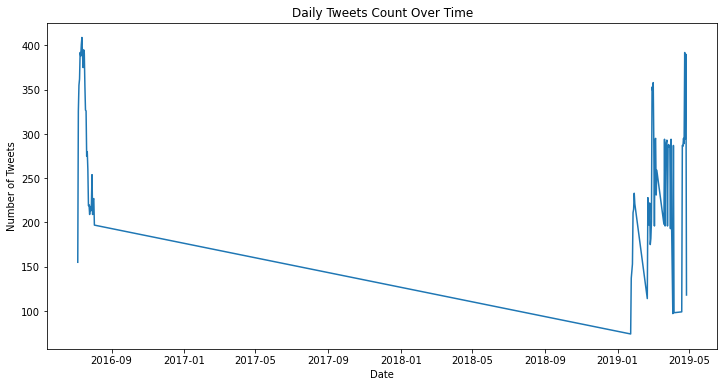

In [89]:
# Plot the daily tweet counts to observe trends, seasonality, or outliers
plt.figure(figsize=(12, 6))
daily_tweet_counts['count'].plot(title='Daily Tweets Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


In [93]:
# Stop the session
spark.stop()
